In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression


In [528]:
raw_data = pd.read_csv("insurance.csv")
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [529]:
raw_data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.00,1338,1338.00,1338.00,1338,1338,1338.00
unique,nan,2,nan,nan,2,4,nan
top,nan,male,nan,nan,no,southeast,nan
freq,nan,676,nan,nan,1064,364,nan
mean,39.21,NaN,30.66,1.09,NaN,NaN,13270.42
std,14.05,NaN,6.10,1.21,NaN,NaN,12110.01
min,18.00,NaN,15.96,0.00,NaN,NaN,1121.87
25%,27.00,NaN,26.30,0.00,NaN,NaN,4740.29
50%,39.00,NaN,30.40,1.00,NaN,NaN,9382.03
75%,51.00,NaN,34.69,2.00,NaN,NaN,16639.91


In [530]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='bmi'>

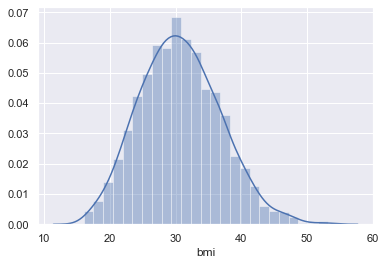

In [531]:
sns.distplot(raw_data["bmi"])

<AxesSubplot:xlabel='age'>

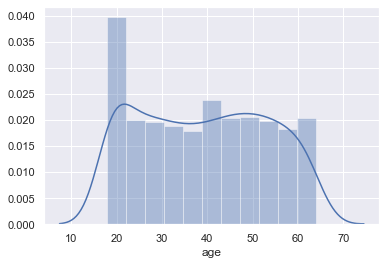

In [532]:

sns.distplot(raw_data["age"])

<AxesSubplot:xlabel='bmi'>

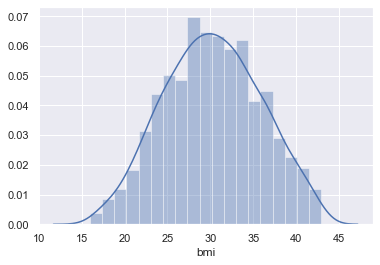

In [533]:
q = raw_data['bmi'].quantile(0.975)
data_1 = raw_data[ raw_data['bmi']<q]
sns.distplot(data_1["bmi"])

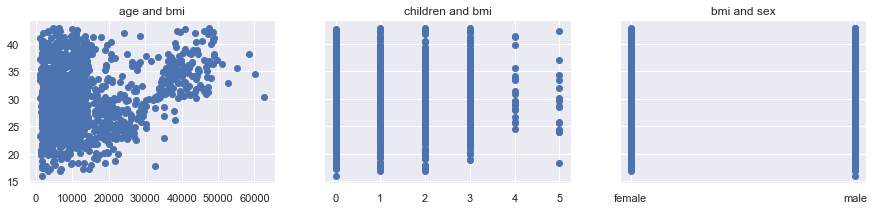

In [534]:
f, (ax1, ax2, ax3,) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'G3' as y
ax1.scatter(data_1['charges'],data_1['bmi'])
ax1.set_title('age and bmi')
ax2.scatter(data_1['children'],data_1['bmi'])
ax2.set_title('children and bmi')
ax3.scatter(data_1['sex'],data_1['bmi'])
ax3.set_title('bmi and sex')
plt.show()

<AxesSubplot:xlabel='charges'>

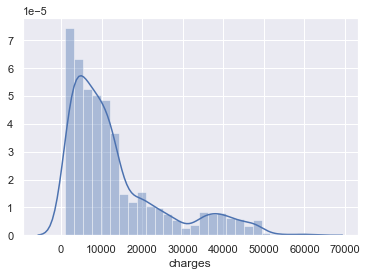

In [535]:
sns.distplot(data_1["charges"])

<AxesSubplot:xlabel='charges'>

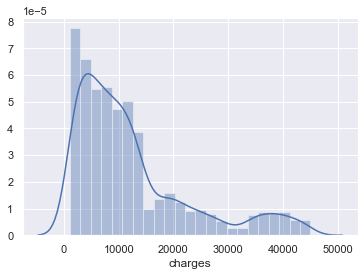

In [536]:
q = data_1['charges'].quantile(0.975)
data_2 = data_1[ data_1['charges']<q]
sns.distplot(data_2["charges"])

<AxesSubplot:xlabel='age'>

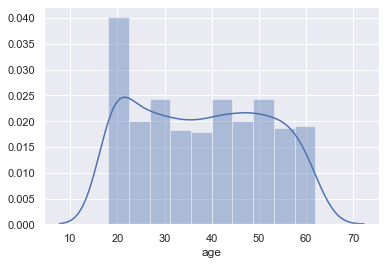

In [537]:
q = data_2['age'].quantile(0.975)
data_3 = data_2[ data_2['age']<q]
sns.distplot(data_3["age"])

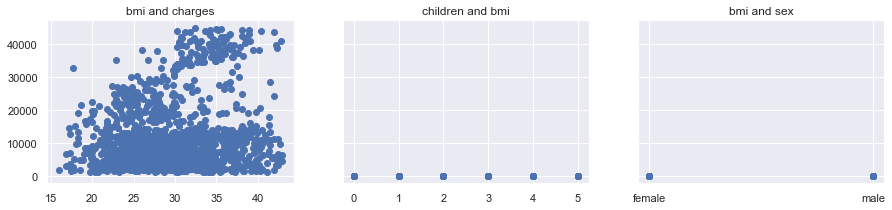

In [538]:
# try make the graph more spread 
f, (ax1, ax2, ax3,) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'G3' as y
ax1.scatter(data_2['bmi'],data_2['charges'])
ax1.set_title('bmi and charges')
ax2.scatter(data_2['children'],data_2['bmi'])
ax2.set_title('children and bmi')
ax3.scatter(data_2['sex'],data_2['bmi'])
ax3.set_title('bmi and sex')
plt.show()

In [539]:
data_3.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [540]:
# prints out unique values

list(set(data_3.sex))
list(data_3['region'].unique())

['southwest', 'southeast', 'northwest', 'northeast']

In [541]:
data_3['sex'] = data_3['sex'].map({'female': 1, 'male': 0})
data_3['smoker'] = data_3['smoker'].map({'yes': 1, 'no': 0})
data_3['region'] = data_3['region'].map({'southwest': 0, 'northwest': 1,'northeast':2,'southeast':3})

C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [542]:
data_2.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [543]:
targets = data_3['charges']
inputs = inputs = data_3.drop(['charges'],axis=1)

In [544]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [545]:
inputs_scaled = scaler.transform(inputs)

In [546]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.1, random_state=365)

In [547]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [548]:
y_hat = reg.predict(x_train)

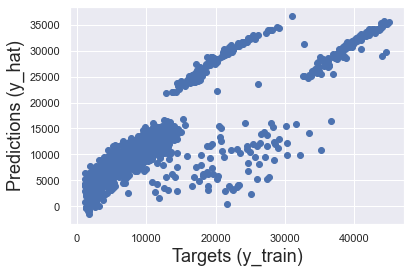

In [549]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

In [550]:
reg.score(x_test,y_test)

0.7351065487793007

In [551]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(x_test, y_test)

0.7215222692295212

In [552]:
reg.intercept_

12139.550178278034

In [553]:
reg.coef_

array([3165.13832176,   24.2249281 , 1699.29144186,  663.57028606,
       8466.33807723,  179.73063697])

In [554]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,3165.14
1,sex,24.22
2,bmi,1699.29
3,children,663.57
4,smoker,8466.34
5,region,179.73


In [555]:
y_hat_test = reg.predict(x_test)

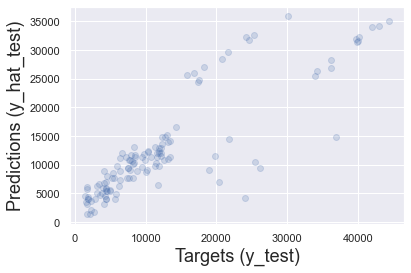

In [556]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [557]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,28214.59
1,12923.51
2,6840.57
3,4035.11
4,6180.86


In [558]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   36197.70
1   11848.14
2    4074.45
3    1880.49
4    1634.57
Name: charges, dtype: float64

In [559]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,28214.59,36197.70
1,12923.51,11848.14
2,6840.57,4074.45
3,4035.11,1880.49
4,6180.86,1634.57
5,7693.93,5253.52
6,5846.14,4454.40
7,9648.55,9447.25
8,2084.90,2221.56
9,11828.98,9722.77


In [560]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

df_pf.describe()

,Prediction,Target,Residual,Difference%
count,124.00,124.00,124.00,124.00
mean,12440.83,12418.83,-22.00,39.52
std,8864.36,10703.71,5508.92,44.43
min,1396.82,1391.53,-9881.04,0.74
25%,6273.99,4550.60,-2550.03,14.87
50%,10281.20,9096.74,-1214.61,25.42
75%,13290.74,13647.11,919.59,48.89
max,35847.19,44423.80,22131.36,278.13


In [561]:
pd.options.display.max_rows = 999
# Display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
82,12057.58,12146.97,89.39,0.74
12,6305.04,6250.44,-54.60,0.87
74,7690.57,7623.52,-67.05,0.88
54,8864.14,8782.47,-81.67,0.93
104,12049.31,11840.78,-208.54,1.76
7,9648.55,9447.25,-201.30,2.13
77,11303.97,11657.72,353.75,3.03
93,7734.32,7419.48,-314.84,4.24
122,12087.37,11554.22,-533.15,4.61
106,12457.35,11842.62,-614.72,5.19
